In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv(r'F:\Desktop\ds\moody_training_data.csv')
test = pd.read_csv(r'F:\Desktop\ds\moody_testing_data.csv')

In [3]:
train.head()

,STUDENTID,SCORE,GRADE,ASKSQUESTIONS,TEXTINGINCLASS,LATEINCLASS
0,65446,23.67,D,never,always,never
1,79686,8.41,F,never,never,rarely
2,56400,69.76,C,never,always,rarely
3,16792,95.51,A,never,always,always
4,92195,67.12,B,frequently,sometimes,never


In [4]:
test.head()

,STUDENTID,SCORE,GRADE,ON_SMARTPHONE,ASKS_QUESTIONS,LEAVES_EARLY,LATE_IN_CLASS
0,201410019,23.98,D,never,sometimes,never,Never
1,201410022,55.42,D,never,always,always,Never
2,201410639,52.24,D,rarely,sometimes,rarely,Sometimes
3,201410704,91.88,D,never,always,always,Yes
4,201410864,3.25,D,never,never,rarely,Yes


In [5]:
train.shape

(998, 6)

In [6]:
test.shape

(581, 7)

In [7]:
train.describe()

,STUDENTID,SCORE
count,998.000000,998.000000
mean,55303.726453,49.749399
std,26025.913708,24.046353
min,10045.000000,1.120000
25%,32285.750000,31.872500
50%,54218.000000,48.935000
75%,78515.500000,68.117500
max,99865.000000,98.970000


In [8]:
test.describe()

,STUDENTID,SCORE
count,5.810000e+02,581.000000
mean,2.014542e+08,51.208675
std,2.639119e+04,24.583434
min,2.014100e+08,1.800000
25%,2.014308e+08,32.600000
50%,2.014539e+08,52.720000
75%,2.014758e+08,68.330000
max,2.014999e+08,98.580000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 6 columns):
STUDENTID         998 non-null int64
SCORE             998 non-null float64
GRADE             998 non-null object
ASKSQUESTIONS     998 non-null object
TEXTINGINCLASS    998 non-null object
LATEINCLASS       998 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.9+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 7 columns):
STUDENTID         581 non-null int64
SCORE             581 non-null float64
GRADE             581 non-null object
ON_SMARTPHONE     581 non-null object
ASKS_QUESTIONS    581 non-null object
LEAVES_EARLY      581 non-null object
LATE_IN_CLASS     581 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 31.9+ KB


In [11]:
#chicking missing values
train.isnull().sum()

STUDENTID         0
SCORE             0
GRADE             0
ASKSQUESTIONS     0
TEXTINGINCLASS    0
LATEINCLASS       0
dtype: int64

In [12]:
test.isnull().sum()

STUDENTID         0
SCORE             0
GRADE             0
ON_SMARTPHONE     0
ASKS_QUESTIONS    0
LEAVES_EARLY      0
LATE_IN_CLASS     0
dtype: int64

In [13]:
train.columns.values

array(['STUDENTID', 'SCORE', 'GRADE', 'ASKSQUESTIONS', 'TEXTINGINCLASS',
       'LATEINCLASS'], dtype=object)

In [14]:
test.columns.values

array(['STUDENTID', 'SCORE', 'GRADE', 'ON_SMARTPHONE', 'ASKS_QUESTIONS',
       'LEAVES_EARLY', 'LATE_IN_CLASS'], dtype=object)

In [15]:
train.GRADE.unique()

array(['D', 'F', 'C', 'A', 'B'], dtype=object)

In [16]:
train.GRADE.value_counts()

C    373
D    194
B    193
F    154
A     84
Name: GRADE, dtype: int64

In [17]:
train.ASKSQUESTIONS.unique()

array(['never', 'frequently', 'rarely'], dtype=object)

In [18]:
train.ASKSQUESTIONS.value_counts()

never         749
frequently    133
rarely        116
Name: ASKSQUESTIONS, dtype: int64

In [19]:
train.TEXTINGINCLASS.unique()

array(['always', 'never', 'sometimes'], dtype=object)

In [20]:
train.TEXTINGINCLASS.value_counts()

always       375
sometimes    331
never        292
Name: TEXTINGINCLASS, dtype: int64

In [21]:
train.LATEINCLASS.unique()

array(['never', 'rarely', 'always'], dtype=object)

In [22]:
train.LATEINCLASS.value_counts()

never     342
always    340
rarely    316
Name: LATEINCLASS, dtype: int64

In [23]:
test.GRADE.unique()

array(['D'], dtype=object)

In [24]:
test.GRADE.value_counts()

D    581
Name: GRADE, dtype: int64

In [25]:
test.ON_SMARTPHONE.unique()

array(['never', 'rarely', 'frequently'], dtype=object)

In [26]:
test.ON_SMARTPHONE.value_counts()

never         424
frequently     80
rarely         77
Name: ON_SMARTPHONE, dtype: int64

In [27]:
test.ASKS_QUESTIONS.unique()

array(['sometimes', 'always', 'never'], dtype=object)

In [28]:
test.ASKS_QUESTIONS.value_counts()

never        197
always       194
sometimes    190
Name: ASKS_QUESTIONS, dtype: int64

In [29]:
test.LEAVES_EARLY.unique()

array(['never', 'always', 'rarely'], dtype=object)

In [30]:
test.LEAVES_EARLY.value_counts()

always    199
never     192
rarely    190
Name: LEAVES_EARLY, dtype: int64

In [31]:
test.LATE_IN_CLASS.unique()

array(['Never', 'Sometimes', 'Yes'], dtype=object)

In [32]:
test.LATE_IN_CLASS.value_counts()

Sometimes    203
Never        196
Yes          182
Name: LATE_IN_CLASS, dtype: int64

# plotting 

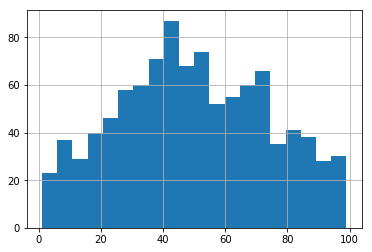

In [33]:
train['SCORE'].hist(bins = 20)
plt.show()

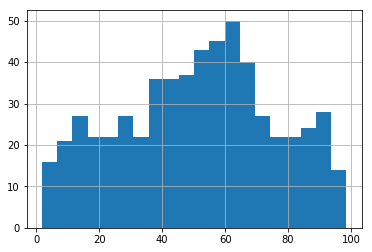

In [34]:
test['SCORE'].hist(bins = 20)
plt.show()

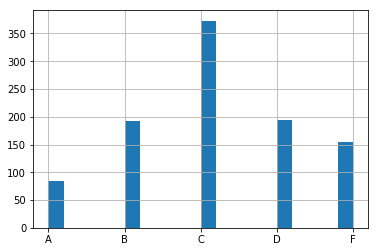

In [35]:
train['GRADE'].hist(bins = 20)
plt.show()

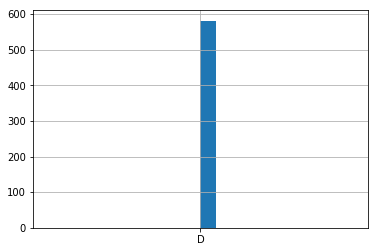

In [36]:
test['GRADE'].hist(bins = 20)
plt.show()

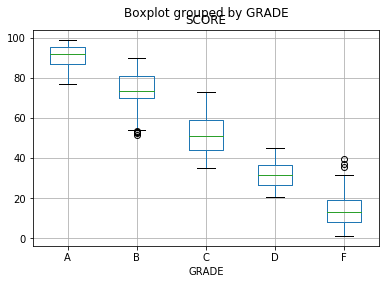

In [37]:
train.boxplot(column = 'SCORE', by = 'GRADE')
plt.show()

Text(0.5,0,'grade')

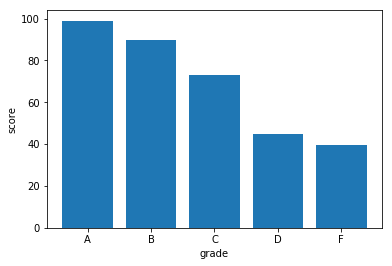

In [38]:
y1 = train['SCORE']
x1 = train['GRADE']
plt.bar(x1,y1)
plt.ylabel('score')
plt.xlabel('grade')

In [39]:
#from sklearn.preprocessing import LabelEncoder
#var_mod = ['GRADE','ASKSQUESTIONS', 'TEXTINGINCLASS','LATEINCLASS']
#le = LabelEncoder()
#for i in var_mod:
 #   train[i] = le.fit_transform(train[i])

#train.dtypes

In [41]:
train = train.drop(['ASKSQUESTIONS','TEXTINGINCLASS','LATEINCLASS'],axis = 1)

In [42]:
train.head()

,STUDENTID,SCORE,GRADE
0,65446,23.67,D
1,79686,8.41,F
2,56400,69.76,C
3,16792,95.51,A
4,92195,67.12,B


In [43]:
#from sklearn.preprocessing import LabelEncoder
#var_mod = [ 'ON_SMARTPHONE', 'ASKS_QUESTIONS','LEAVES_EARLY', 'LATE_IN_CLASS']
#le = LabelEncoder()
#for i in var_mod:
#    test[i] = le.fit_transform(test[i])

#test.dtypes

In [44]:
test = test.drop(['ON_SMARTPHONE','ASKS_QUESTIONS','LEAVES_EARLY','LATE_IN_CLASS'],axis = 1)

In [45]:
test.head()

,STUDENTID,SCORE,GRADE
0,201410019,23.98,D
1,201410022,55.42,D
2,201410639,52.24,D
3,201410704,91.88,D
4,201410864,3.25,D


In [46]:
X = train.drop(['GRADE'],axis = 1)
y = train.GRADE

In [47]:
X.shape

(998, 2)

In [48]:
y.shape

(998,)

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [52]:
test = test.drop(['GRADE'],axis = 1)
test.head()

,STUDENTID,SCORE
0,201410019,23.98
1,201410022,55.42
2,201410639,52.24
3,201410704,91.88
4,201410864,3.25


In [53]:
test.shape

(581, 2)

In [54]:
predicted = clf.predict(test)

In [55]:
print(predicted)

['D' 'C' 'C' 'A' 'F' 'C' 'B' 'C' 'C' 'F' 'B' 'A' 'A' 'C' 'C' 'C' 'C' 'C'
 'F' 'C' 'B' 'C' 'F' 'D' 'C' 'B' 'C' 'C' 'A' 'C' 'C' 'F' 'B' 'D' 'C' 'D'
 'F' 'F' 'F' 'B' 'C' 'C' 'F' 'B' 'C' 'C' 'C' 'C' 'F' 'F' 'F' 'C' 'F' 'B'
 'C' 'F' 'F' 'C' 'C' 'F' 'D' 'A' 'F' 'B' 'D' 'B' 'C' 'C' 'B' 'C' 'C' 'B'
 'F' 'F' 'C' 'A' 'C' 'D' 'A' 'F' 'C' 'B' 'F' 'C' 'F' 'C' 'F' 'C' 'F' 'C'
 'C' 'B' 'C' 'B' 'C' 'B' 'C' 'D' 'C' 'F' 'A' 'C' 'C' 'C' 'C' 'C' 'D' 'B'
 'F' 'B' 'C' 'A' 'A' 'A' 'C' 'F' 'B' 'C' 'F' 'F' 'C' 'C' 'B' 'C' 'C' 'B'
 'C' 'B' 'C' 'D' 'F' 'F' 'C' 'F' 'B' 'B' 'B' 'C' 'F' 'D' 'C' 'F' 'C' 'F'
 'A' 'F' 'C' 'F' 'B' 'A' 'C' 'C' 'A' 'B' 'D' 'F' 'C' 'C' 'C' 'C' 'F' 'C'
 'F' 'C' 'B' 'C' 'B' 'C' 'F' 'F' 'D' 'B' 'C' 'C' 'F' 'A' 'A' 'C' 'D' 'C'
 'B' 'B' 'A' 'A' 'F' 'C' 'C' 'C' 'F' 'F' 'F' 'B' 'B' 'C' 'F' 'A' 'C' 'F'
 'A' 'C' 'C' 'F' 'B' 'C' 'B' 'C' 'C' 'B' 'F' 'D' 'C' 'C' 'C' 'C' 'C' 'C'
 'F' 'C' 'C' 'A' 'C' 'B' 'F' 'C' 'C' 'D' 'C' 'C' 'B' 'F' 'C' 'C' 'F' 'C'
 'A' 'C' 'C' 'F' 'C' 'D' 'A' 'A' 'B' 'C' 'C' 'C' 'A

In [56]:
#for dataset in predicted:
 #   dataset['GRADE'] = dataset['GRADE'].map({0:'A',1:'B',2:'C',3:'D',4:'F'})(predicted)
   

In [57]:
predicted.shape

(581,)

In [75]:
output = pd.DataFrame(predicted,columns = ['GRADE'])
#output.reset_index(inplace= True)
#output['index'] = output['index'] + 1
test = pd.read_csv(r'F:\Desktop\ds\moody_testing_data.csv')
output['STUDENTID'] = test['STUDENTID']

#output.rename(columns={'index': 'STUDENTID'}, inplace=True)
output[['STUDENTID','GRADE']].to_csv('submission_file.csv', index = False)
output.head()


,GRADE,STUDENTID
0,D,201410019
1,C,201410022
2,C,201410639
3,A,201410704
4,F,201410864


In [76]:
output.shape

(581, 2)